# Classificador Spotify 

### Integrantes:
* `Andresa Bicudo`
* `Gabriel Yamashita`
* `Leonardo Malta`

In [1]:
# Importando Bibliotecas 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re 
import functools
import operator
import re

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\user\Documents\Insper\2° semestre\CDados\Projetos\Projeto2_Cdados


In [3]:
dados = pd.read_excel('streaming_history.xlsx')
dados.head(10)

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,1,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.000000,0.0930,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),0,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.000000,0.3680,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4
2,Sentimento Bom,0,0.780,0.607,9,-6.440,1,0.0864,0.2060,0.000016,0.4400,0.732,130.076,0vyKzl0o1lem1sHg5wXgSD,spotify:track:0vyKzl0o1lem1sHg5wXgSD,https://api.spotify.com/v1/tracks/0vyKzl0o1lem...,https://api.spotify.com/v1/audio-analysis/0vyK...,241813,4
3,All Star,2,0.512,0.391,9,-10.400,1,0.0492,0.8890,0.000003,0.7140,0.277,138.094,3g5FrnRdbmDQyWNiDIprts,spotify:track:3g5FrnRdbmDQyWNiDIprts,https://api.spotify.com/v1/tracks/3g5FrnRdbmDQ...,https://api.spotify.com/v1/audio-analysis/3g5F...,233613,4
4,Contrato de RenovaÃ§Ã£o - Ao Vivo,1,0.577,0.752,9,-7.447,1,0.0654,0.7290,0.000000,0.9290,0.844,90.213,4C2eQoWJ1pkAFiZ0CDQ3Gt,spotify:track:4C2eQoWJ1pkAFiZ0CDQ3Gt,https://api.spotify.com/v1/tracks/4C2eQoWJ1pkA...,https://api.spotify.com/v1/audio-analysis/4C2e...,226951,4
5,Sem Medo de Amar,1,0.645,0.636,6,-6.434,1,0.0702,0.1720,0.000000,0.1730,0.907,169.848,7yAwFhtyKi51mACxTqOiu7,spotify:track:7yAwFhtyKi51mACxTqOiu7,https://api.spotify.com/v1/tracks/7yAwFhtyKi51...,https://api.spotify.com/v1/audio-analysis/7yAw...,211397,4
6,Before You Go,0,0.459,0.575,3,-4.858,1,0.0573,0.6040,0.000000,0.0885,0.183,111.881,7ce20yLkzuXXLUhzIDoZih,spotify:track:7ce20yLkzuXXLUhzIDoZih,https://api.spotify.com/v1/tracks/7ce20yLkzuXX...,https://api.spotify.com/v1/audio-analysis/7ce2...,215107,4
7,puxando o rodo - ao vivo,1,0.574,0.791,2,-4.859,1,0.0435,0.4330,0.000007,0.4550,0.398,171.060,0JAgLcKfRQJ1uz9RExRldH,spotify:track:0JAgLcKfRQJ1uz9RExRldH,https://api.spotify.com/v1/tracks/0JAgLcKfRQJ1...,https://api.spotify.com/v1/audio-analysis/0JAg...,185481,4
8,Recess,0,0.576,0.412,11,-8.184,1,0.0368,0.6590,0.000000,0.1500,0.399,188.821,1QtpKRXtJZSdJp3Y299zkQ,spotify:track:1QtpKRXtJZSdJp3Y299zkQ,https://api.spotify.com/v1/tracks/1QtpKRXtJZSd...,https://api.spotify.com/v1/audio-analysis/1Qtp...,230501,3
9,O Que SerÃ¡ (A Flor Da Terra),0,0.435,0.671,2,-10.750,0,0.0586,0.4870,0.000000,0.5890,0.792,157.564,0rfbvwLPBLBsEd4Bxz8IVb,spotify:track:0rfbvwLPBLBsEd4Bxz8IVb,https://api.spotify.com/v1/tracks/0rfbvwLPBLBs...,https://api.spotify.com/v1/audio-analysis/0rfb...,166573,4


In [4]:
# Transformando variável quantitativa em qualitativa 
dados.loc[:,'like'] = dados['like'].astype('category')
dados.like.cat.categories = ['hate', 'like', 'love']
dados.head(10)

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,like,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.000000,0.0930,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),hate,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.000000,0.3680,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4
2,Sentimento Bom,hate,0.780,0.607,9,-6.440,1,0.0864,0.2060,0.000016,0.4400,0.732,130.076,0vyKzl0o1lem1sHg5wXgSD,spotify:track:0vyKzl0o1lem1sHg5wXgSD,https://api.spotify.com/v1/tracks/0vyKzl0o1lem...,https://api.spotify.com/v1/audio-analysis/0vyK...,241813,4
3,All Star,love,0.512,0.391,9,-10.400,1,0.0492,0.8890,0.000003,0.7140,0.277,138.094,3g5FrnRdbmDQyWNiDIprts,spotify:track:3g5FrnRdbmDQyWNiDIprts,https://api.spotify.com/v1/tracks/3g5FrnRdbmDQ...,https://api.spotify.com/v1/audio-analysis/3g5F...,233613,4
4,Contrato de RenovaÃ§Ã£o - Ao Vivo,like,0.577,0.752,9,-7.447,1,0.0654,0.7290,0.000000,0.9290,0.844,90.213,4C2eQoWJ1pkAFiZ0CDQ3Gt,spotify:track:4C2eQoWJ1pkAFiZ0CDQ3Gt,https://api.spotify.com/v1/tracks/4C2eQoWJ1pkA...,https://api.spotify.com/v1/audio-analysis/4C2e...,226951,4
5,Sem Medo de Amar,like,0.645,0.636,6,-6.434,1,0.0702,0.1720,0.000000,0.1730,0.907,169.848,7yAwFhtyKi51mACxTqOiu7,spotify:track:7yAwFhtyKi51mACxTqOiu7,https://api.spotify.com/v1/tracks/7yAwFhtyKi51...,https://api.spotify.com/v1/audio-analysis/7yAw...,211397,4
6,Before You Go,hate,0.459,0.575,3,-4.858,1,0.0573,0.6040,0.000000,0.0885,0.183,111.881,7ce20yLkzuXXLUhzIDoZih,spotify:track:7ce20yLkzuXXLUhzIDoZih,https://api.spotify.com/v1/tracks/7ce20yLkzuXX...,https://api.spotify.com/v1/audio-analysis/7ce2...,215107,4
7,puxando o rodo - ao vivo,like,0.574,0.791,2,-4.859,1,0.0435,0.4330,0.000007,0.4550,0.398,171.060,0JAgLcKfRQJ1uz9RExRldH,spotify:track:0JAgLcKfRQJ1uz9RExRldH,https://api.spotify.com/v1/tracks/0JAgLcKfRQJ1...,https://api.spotify.com/v1/audio-analysis/0JAg...,185481,4
8,Recess,hate,0.576,0.412,11,-8.184,1,0.0368,0.6590,0.000000,0.1500,0.399,188.821,1QtpKRXtJZSdJp3Y299zkQ,spotify:track:1QtpKRXtJZSdJp3Y299zkQ,https://api.spotify.com/v1/tracks/1QtpKRXtJZSd...,https://api.spotify.com/v1/audio-analysis/1Qtp...,230501,3
9,O Que SerÃ¡ (A Flor Da Terra),hate,0.435,0.671,2,-10.750,0,0.0586,0.4870,0.000000,0.5890,0.792,157.564,0rfbvwLPBLBsEd4Bxz8IVb,spotify:track:0rfbvwLPBLBsEd4Bxz8IVb,https://api.spotify.com/v1/tracks/0rfbvwLPBLBs...,https://api.spotify.com/v1/audio-analysis/0rfb...,166573,4


In [5]:
dados.like.value_counts()

love    355
like    284
hate    161
Name: like, dtype: int64

## Análise Inicial:

In [6]:
hate = dados.loc[dados['like'] == 'hate', :]
like = dados.loc[dados['like'] == 'like', :]
love = dados.loc[dados['like'] == 'love', :]

In [7]:
# Função que cria faixas de valores para histogramas
def CriaFaixa(lista):
    a = lista.min()
    b = lista.max()
    passo = (b-a)/10
    faixa = list(np.arange(a,b,passo))
    return faixa

### Histogramas Comparativos

Text(0, 0.5, 'frequency')

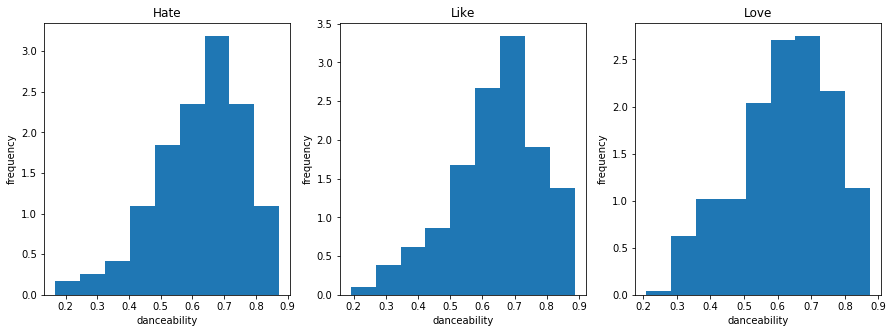

In [8]:
# Danceability
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.danceability, bins=CriaFaixa(hate.danceability), density=True)
plt.title('Hate')
plt.xlabel('danceability')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.danceability, bins=CriaFaixa(like.danceability), density=True)
plt.title('Like')
plt.xlabel('danceability')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.danceability, bins=CriaFaixa(love.danceability), density=True)
plt.title('Love')
plt.xlabel('danceability')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

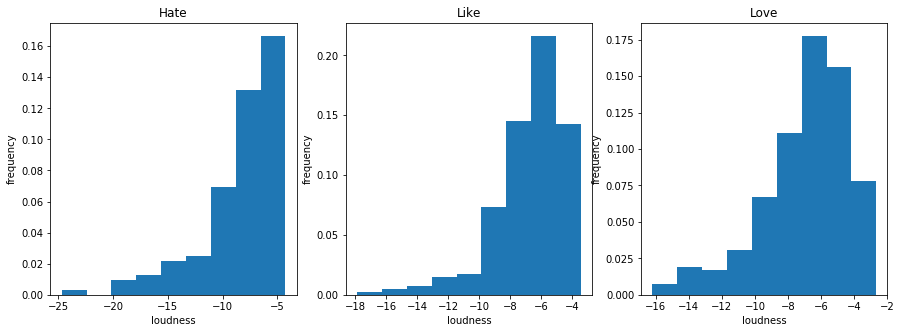

In [9]:
# Loudness
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.loudness, bins=CriaFaixa(hate.loudness), density=True)
plt.title('Hate')
plt.xlabel('loudness')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.loudness, bins=CriaFaixa(like.loudness), density=True)
plt.title('Like')
plt.xlabel('loudness')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.loudness, bins=CriaFaixa(love.loudness), density=True)
plt.title('Love')
plt.xlabel('loudness')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

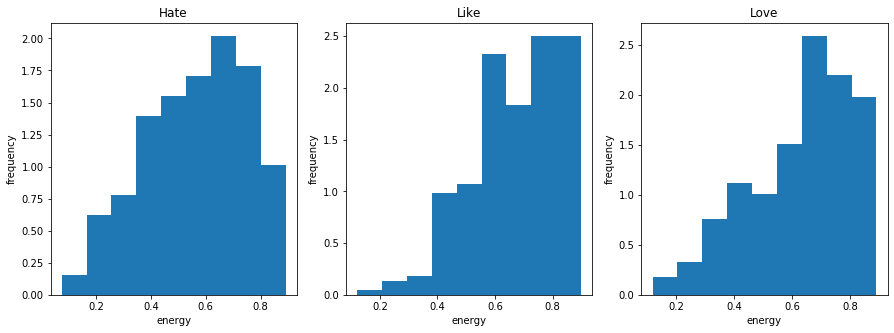

In [10]:
# Energy
f, axs = plt.subplots(2,2,figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(hate.energy, bins=CriaFaixa(hate.energy), density=True)
plt.title('Hate')
plt.xlabel('energy')
plt.ylabel('frequency')

plt.subplot(1, 3, 2)
plt.hist(like.energy, bins=CriaFaixa(like.energy), density=True)
plt.title('Like')
plt.xlabel('energy')
plt.ylabel('frequency')

plt.subplot(1, 3, 3)
plt.hist(love.energy, bins=CriaFaixa(love.energy), density=True)
plt.title('Love')
plt.xlabel('energy')
plt.ylabel('frequency')